# How to Scale your Model

Link: https://jax-ml.github.io/scaling-book/

### Types of time

There are two types of time

- **computation time** - how much time accelerator spends on compute

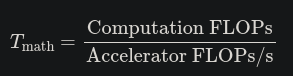

Computation FLOPs - how many FLOPs is needed to perform computation

Accelerator FLOPs/s - how many FLOPs accelerator can perform in one second

- **communication time** - how much time accelerator spends on sending/receiving data

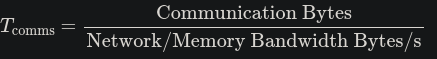

Communication Bytes - how many bytes is needed to read/write/send to another block inside accelerator or send to another accelerator

Network/Memory Bandwidth - it is what it is

### Upper and Lower bounds

Typically (but not always), computation within a single chip can be overlapped with communication within a chip and between chips. This means we can lower-bound training and inference time by using the maximum of computation and communication time. The upper bound is sum of these two times:

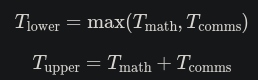

Usually we use optimize against the maximum as the algebra is simpler and we can usually come close to this bound by overlapping our communication and computation.

### Compute and communication bound

T<sub>math</sub> > T<sub>comms</sub> - full utilization from our hardware, we that this operation is **“compute-bound”** and this is desired situation

T<sub>math</sub> < T<sub>comms</sub> - underutilization because some fraction of our accelerator FLOPs/s is wasted waiting for data to be passed around, operation is **“communication-bound"**

### Arithmetic Intensity

 One way to tell if an operation will be compute or communication-bound is to look at its “arithmetic intensity” or “operational intensity”.

 **Definition**: the arithmetic intensity of an algorithm is given by the ratio of the total FLOPs it performs to the number of bytes it needs to communicate — either within a chip or between chips.

 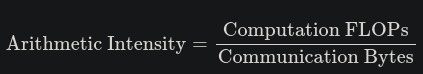

Accelerator has its own arithmetic intensity too and we can derive the relation between this intensities from relation between times:

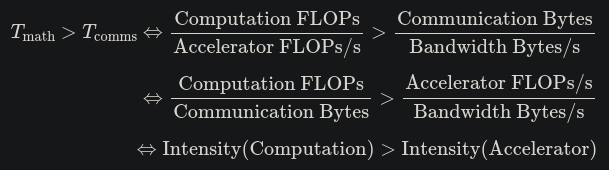

So, if we want our accelerator to be fully utilized by computing algorithm, we need intensity of this algorithm to be more than intensity of accelerator.


### Visualizing rooflines

We can visualize the tradeoff between memory and compute using a roofline plot, which plots the peak achievable FLOPs/s (throughput) of an algorithm on our hardware (the y-axis) against the arithmetic intensity of that algorithm (the x-axis). Here’s an example log-log plot:

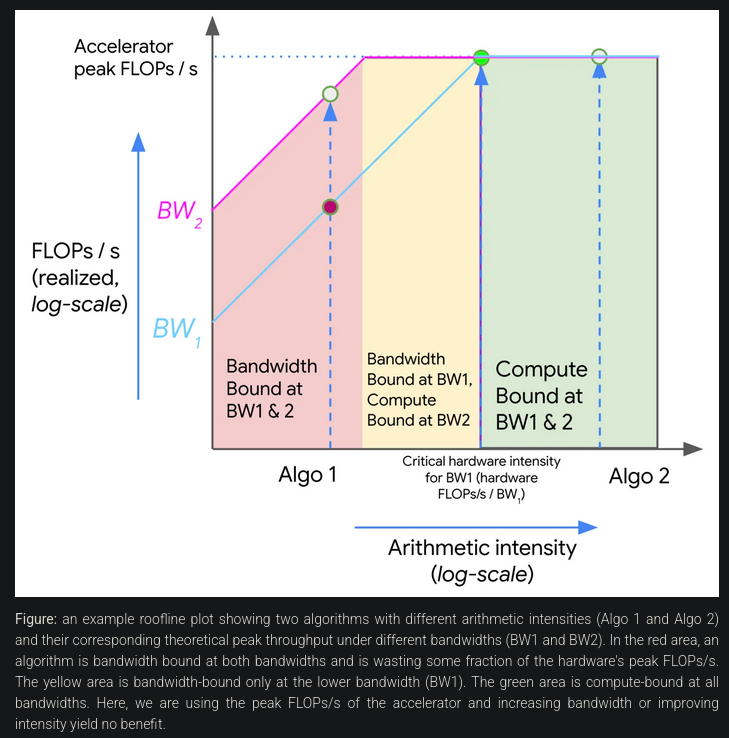